In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Initialize Chrome WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Access the Formula 1 2024 season results page
driver.get('https://www.formula1.com/en/results.html/2024/drivers.html')

# Wait for the page to load
time.sleep(5)  

print("Webpage loaded successfully")


Webpage loaded successfully


In [4]:
# Locate table data
table_rows = driver.find_elements(By.CSS_SELECTOR, 'table tbody tr')

# Extract data
f1_data = []
for row in table_rows:
    cols = row.find_elements(By.TAG_NAME, 'td')
    f1_data.append([col.text for col in cols])

# Debugging: Print the first few rows to check structure
for i, row in enumerate(f1_data[:5]):
    print(f"Row {i+1}: {row}")

# Ensure all rows have the same number of columns
max_cols = max(len(row) for row in f1_data)
print(f"Detected {max_cols} columns in scraped data.")

# Dynamically generate column names
columns = ["Position", "Driver", "Team", "Points"]  # Modify if necessary

# Adjust column count if necessary
if len(columns) != max_cols:
    columns = [f"Column_{i+1}" for i in range(max_cols)]

# Convert to DataFrame
df = pd.DataFrame(f1_data, columns=columns)

# Save to CSV
df.to_csv("formula1_2024_results_fixed.csv", index=False)

# Close WebDriver
driver.quit()

# Display DataFrame
display(df)


Row 1: ['1', ' Verstappen', 'NED', 'Red Bull Racing Honda RBPT', '437']
Row 2: ['2', ' Norris', 'GBR', 'McLaren Mercedes', '374']
Row 3: ['3', ' Leclerc', 'MON', 'Ferrari', '356']
Row 4: ['4', ' Piastri', 'AUS', 'McLaren Mercedes', '292']
Row 5: ['5', ' Sainz', 'ESP', 'Ferrari', '290']
Detected 5 columns in scraped data.


,Column_1,Column_2,Column_3,Column_4,Column_5
0,1,Verstappen,NED,Red Bull Racing Honda RBPT,437
1,2,Norris,GBR,McLaren Mercedes,374
2,3,Leclerc,MON,Ferrari,356
3,4,Piastri,AUS,McLaren Mercedes,292
4,5,Sainz,ESP,Ferrari,290
5,6,Russell,GBR,Mercedes,245
6,7,Hamilton,GBR,Mercedes,223
7,8,Perez,MEX,Red Bull Racing Honda RBPT,152
8,9,Alonso,ESP,Aston Martin Aramco Mercedes,70
9,10,Gasly,FRA,Alpine Renault,42


In [7]:
# Rename columns correctly
df.columns = ["Position", "Driver", "Nationality", "Team", "Points"]

# Convert Points column to numeric
df["Points"] = pd.to_numeric(df["Points"], errors='coerce')

# Display updated DataFrame
display(df.head())


,Position,Driver,Nationality,Team,Points
0,1,Verstappen,NED,Red Bull Racing Honda RBPT,437
1,2,Norris,GBR,McLaren Mercedes,374
2,3,Leclerc,MON,Ferrari,356
3,4,Piastri,AUS,McLaren Mercedes,292
4,5,Sainz,ESP,Ferrari,290


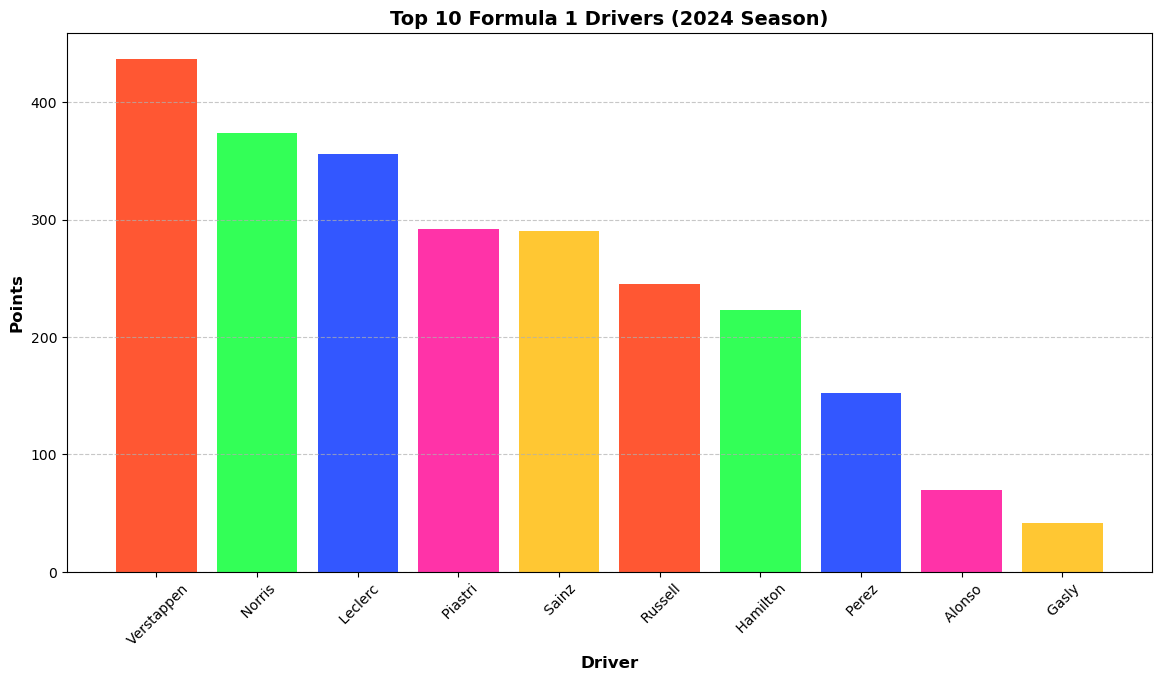

In [9]:
# Select top 10 drivers
df_top10 = df.head(10)

# Plot top 10 drivers with a unique visual style
plt.figure(figsize=(14,7))
plt.bar(df_top10["Driver"], df_top10["Points"], color=["#FF5733", "#33FF57", "#3357FF", "#FF33A8", "#FFC733"])
plt.xlabel("Driver", fontsize=12, fontweight='bold')
plt.ylabel("Points", fontsize=12, fontweight='bold')
plt.title("Top 10 Formula 1 Drivers (2024 Season)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


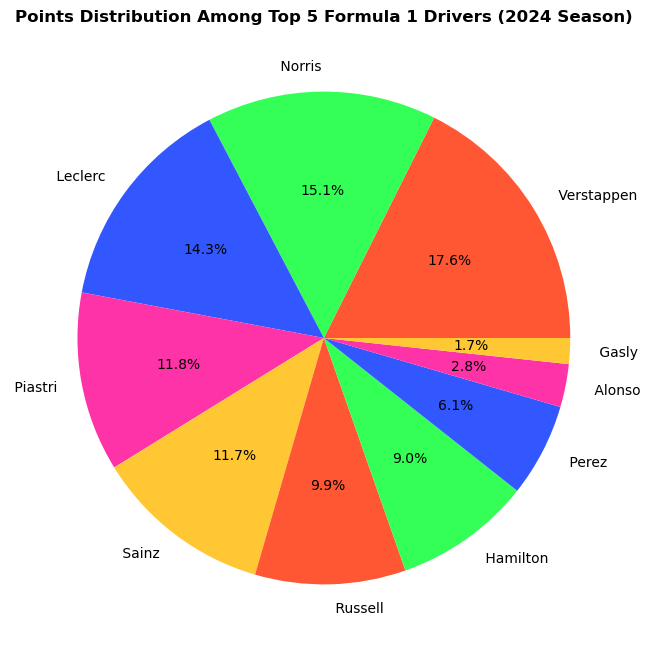

In [11]:
# Plot pie chart to show points distribution among top 5 drivers
plt.figure(figsize=(8,8))
plt.pie(df_top10["Points"], labels=df_top10["Driver"], autopct='%1.1f%%', colors=["#FF5733", "#33FF57", "#3357FF", "#FF33A8", "#FFC733"])
plt.title("Points Distribution Among Top 5 Formula 1 Drivers (2024 Season)", fontsize=12, fontweight='bold')

plt.show()


/var/folders/qq/b2kggtxn2psgcd0jcfntcx_c0000gn/T/ipykernel_96799/3916963982.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Points", y="Team", data=team_points, palette="viridis")


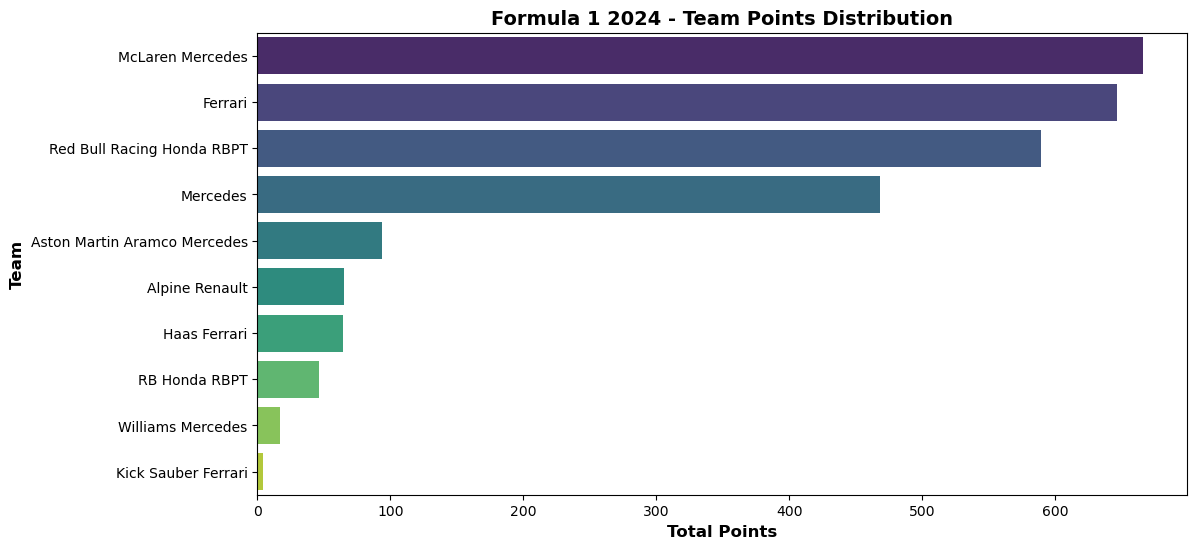

In [13]:
# Aggregate points by team
team_points = df.groupby("Team")["Points"].sum().reset_index()

# Sort by points
team_points = team_points.sort_values(by="Points", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Points", y="Team", data=team_points, palette="viridis")
plt.xlabel("Total Points", fontsize=12, fontweight='bold')
plt.ylabel("Team", fontsize=12, fontweight='bold')
plt.title("Formula 1 2024 - Team Points Distribution", fontsize=14, fontweight='bold')

plt.show()
